In [77]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import words as nltk_words
import os
import data_analysis.preprocessor_end as pre
import classifier

C:\Users\Abdo\PycharmProjects\final_project_1\venv\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [31]:
# key : label_movie/book (the not labeled dict is for the books we don't have a clear label about)
# value its corresponding dict
#        key: word
#        value: number of occurencies 
dict_of_dicts = {
    "1_movies" : {},
    "0_movies" : {},
    "1_books" : {},
    "0_books" : {},
    "not_labeled_1_books" : {},
    "not_labeled_0_books" : {}
}

In [86]:
# takes a key (a word) and adds one to its number of occurences if it exist, or initialize it to 1 
def add_value_to_dict(words_dict, key):
    if key in words_dict:
        words_dict[key] += 1
    else:
        words_dict[key] = 1
# returns a [ (frequency_of_word, word), (), ...  ]
def get_most_frequent_n_words(dict_of_words, unique_words, n):
    unique_words_occurncy = []
    for unique_word in unique_words:
        unique_words_occurncy.append((dict_of_words[unique_word], unique_word))
    unique_words_occurncy.sort(reverse=True)
    return [unique_words_occurncy[:n]]

#plots
def plot_bar_char_and_save_it(value_name_tuples_list, file_path_name, figure_title, x_axis_label, y_axis_label):
    list_of_slice_names = []
    list_of_slice_values = []
    for value_name_tuple in value_name_tuples_list:
        list_of_slice_names.append(value_name_tuple[1])
        list_of_slice_values.append(value_name_tuple[0])
        
    plt.figure(figsize=(10,10))
    index = np.arange(len(list_of_slice_names))
    plt.bar(index, list_of_slice_values) # y axis
    plt.xticks(index, list_of_slice_names, fontsize=10, rotation=30)
    plt.title(figure_title)
    plt.xlabel(x_axis_label, fontsize=15)
    plt.ylabel(y_axis_label, fontsize=15)
    plt.savefig(file_path_name)
    plt.show()

In [71]:
directory_path = "C:/Users/Abdo/Project/test_data/books_txt/"

In [72]:
folders = os.listdir(directory_path)

In [73]:
total_length = 0
for folder in folders:
    if folder != "1":
        files = os.listdir(directory_path+folder+"/")
        for file in files:
            try:
                doc = pre.preprocess_file(directory_path+folder+"/", file, True)
            except:
                doc = pre.preprocess_file(directory_path+folder+"/", file, False)
            total_length += len(doc)

5042 Voodoo In Haiti by Aubrey Wilder.txt


A Night To Remember by Argus.txt
A Night To Remember by Argus.txt
AB-1609 House of Dark Pleasure by Gloria Day.txt


AB-1676 Beasts Are Better by Richard Long.txt


AB-1680 The Dog Ballers by Don Russell.txt


AB-5247 Incest Wifeby M J Jacobs.txt


AB-5341 Mother With The Hots by Kathy Andrews.txt


AB-5353 Harder! Mom Said by Kathy Andrews.txt


AB-5356 What A Sucking Mother! by Kathy Andrews.txt


AB-5389 Daddy's Naughty Daughters by Bob Wallace.txt


AB-5475 Family Peepers by David Crane.txt


AB-5480 Billy's Hot Mom by Kathy Andrews.txt
AB-5480 Billy's Hot Mom by Kathy Andrews.txt


AB-5491 Three Sucking Daughters by Dan Reagan.txt


AB-5548 A Wild Family Party by Hank Borden.txt


AB-5557 Pay For Play Cheerleaders by Victoria Parker.txt


AB-5574 Twin Farmgirl Cousins by Ron Taylor.txt


AB-5592 First Time In The Behind by Ron Taylor.txt


AB-5602 When Mom And Dad Are Away by Author Unknown.txt


AB-5617 Brothers Ball Best by Ray Mills.txt


AB-5618 Incest Schoolgirls by Victoria Parker.txt


ACDC-182 Swap Night.txt


All_in_the_Family.txt


ASP-2021 Driven Into Swapping.txt
ASP-2021 Driven Into Swapping.txt


AudioBook The Gunslinger Chapter - English (auto-generated).txt


AW-103.TXT
AW-103.TXT


A_Mother-Daughter_Twosome.txt


A_Wild_Family_Party.txt


BB-6565 Deep Crotch Mother.txt


BDB-1023 Step-Daughter Initiation.txt


Beast Humping by Ron Bywood.txt


Billy's_Hot_Mom.txt
Billy's_Hot_Mom.txt


BL-5341 Emily_s Lips By Arthur Alexander.txt


Blackmailed.txt
Blackmailed.txt


Brothers_Ball_Best.txt


Carve the Mark Chapter 1 - English (auto-generated).txt
Carve The Mark Chapter 2 - English (auto-generated) (1).txt
Carve The Mark Chapter 2 - English (auto-generated).txt


Carve the Mark Chapter 4 - English (auto-generated).txt
Carve The Mark Chapter 5 - English (auto-generated).txt
CC-241 The Family Haven BOOK ONE by Author Unknown.txt
CC-241 The Family Haven BOOK ONE by Author Unknown.txt


Charles_Wykes.Brothers_and_Sisters.FAM-119.TXT
Charles_Wykes.Brothers_and_Sisters.FAM-119.TXT


Cheryl's Cumuppance - Ex-Wives III.txt
Cheryl's Cumuppance - Ex-Wives III.txt


CHINA TEEN PHOTO SLAVES by Loren Ryder.txt
CHINA TEEN PHOTO SLAVES by Loren Ryder.txt


Daddy's_Naughty_Daughters.txt


Daughters_In_Heat.txt


Desert Slave by Argus.txt
Desert Slave by Argus.txt
Dog Lover's Diary by Horst Kepple.txt


Doggie Farm by John Reskin.txt


Eager_Horny_Cousin.txt


EC-1120 Bestiality and a Young Girl by Kathleen Hennessy.txt


EX-WIVES - PART IV DESTINY.txt
EX-WIVES - PART IV DESTINY.txt


EX-WIVES INHERITANCE - PART 1 - JULIA DAWSON.txt
EX-WIVES INHERITANCE - PART 1 - JULIA DAWSON.txt


EX-WIVES INHERITANCE - PART 2 - DOMINIQUE'S TAMING.txt
EX-WIVES INHERITANCE - PART 2 - DOMINIQUE'S TAMING.txt


FAM-119 Brothers And Sisters by Charles Wykes.txt
FAM-119 Brothers And Sisters by Charles Wykes.txt


Family_Peepers.txt


First_Time_In_The_Behind.txt


FLP-135 Girl's Camp Counselor by Paul Sutherland.txt


GE-2033 Spouse In Torment by Jason Cannon.txt


GGE-101 Teaching Swapping by Author Unknown.txt


GK-550 The Soldier's Wife by Alex Ayers.txt


gs-59.txt


gsv-133.txt


Hard to tell by Arianne.txt
Hard to tell by Arianne.txt
herbarkingstud.txt


Her_Husband's_Boss.txt


House_Of_Evil.txt


Impossible-Standards.txt


Incest Schoolgirls.txt


Incest_Wife.txt


In_Bondage_Schoolgirl.txt


j-3.txt


kc-126.txt


LB1348 The Family Sucks A Lot .txt


lcs-70003.txt


Legal Briefs by Argus.txt
Little Monsters by Kara Thomas, read by Phoebe Strole _ Brittany Pressley - Audiobook Excerpt - English (auto-generated).txt
LL-0229 Shack-Ups! by Fran Furnivall.txt


LL-0251 Auntie’s Naughty Boys by Hank Faber.txt


LL-0344 His Sexpot Sis by Robert G. Haill.txt


LLP0101 The Abducted Bride.txt


LLP0102 The Blackmailed Wife.txt


LLP0103 A Neighborhood Party.txt


LLP0171 Honeymoon Hotel.txt


LLP0348 The Motorcyclist_s Wife.txt


LLP0874 A Sister_s Lust by Audrey Gait.txt


m-4006.txt


m-60212.txt


mastlilg.txt


mlp-146.txt


nakedwithherdog.txt


Naked_Wet_Daughter.txt


Naughty Schooling by David Shaw.txt
Naughty_Wild_Cousin.txt


nd-141.txt


ns-451.txt


oa-117.txt


OES-117 Maggie_s Moist Mouth.txt


OES-138 The Mouth Seducers by Fred Tracy.txt


oph-217.txt


ORL-149 Oral Zone by Otto Gerbert.txt


ORL-155 Oral Nieces by Jim Stacey.txt


p-2064.txt


Passionate_Sister.txt
Passionate_Sister.txt


Paul_Sutherland.Girls_Camp_Counselor.FLP-135.txt


Peeper by Argus.txt
Pirates' Sex Toys by Argus.txt


Pirates' Sex Toys by Argus.txt
pp-11.txt


pp-13.txt


pp-7001.txt


pp-7002.txt


pp-7012.txt


pp-7027.txt


pp-7042.txt


pp-7046.txt


pp-7093.txt


pp-7205.txt


pp-7206.txt


pp-7208.txt


pp-7285.txt


pp-7304.txt


pp-7339.txt


pp-7375.txt


pp-7388.txt


pp-7397.txt


pp-7524.txt


pp-7541.txt


pp-8001.txt


pp-8016.txt


pp-8049.txt


pp-8051.txt


pp-8060.txt


Punching Bag by Argus.txt
Punching Bag by Argus.txt
ras-1405.txt
ras-1405.txt


rcl-216.txt
rcl-216.txt


RCL-228 Little Boys And Laura.txt


sb-206.txt


sc-173.txt


Schoolgirl_Bondage.txt


Seduced_Young_Wife.txt


Servile Sluts by Jay Merson.txt


Sexy Sailors by Frances La Gatta.txt
Sexy Sailors by Frances La Gatta.txt


Sister's_Husband.txt


Sister's_Wet_Panties.txt


Sister_Sucks_Best.txt


Slave_Trader's_Captive.txt


Slut by Argus.txt
Slut by Argus.txt


Summer Lovers by Argus.txt
Summer Lovers by Argus.txt


Taken By Force by Jay Merson.txt
Taken By Force by Jay Merson.txt


THE CAPTIVE by Amber Jameson.txt


THE CONTRACT by Sarah Fisher.txt


THE DRIVERS by Henry Morgan.txt
THE DRIVERS by Henry Morgan.txt


The Secret Fantasies of a Suburban Girl by Laura Jenkins.txt
The Secret Fantasies of a Suburban Girl by Laura Jenkins.txt


The_Orgiastic_Cult.txt


The_Rancher's_Wife.txt


The_Seductive_Sister-In-Law.txt


The_Tempted_Tourist.txt


The_Unfaithful_Girlfriend.txt


The_Weekend_Captive.txt


Three-Way_Weekend.txt


Three_Sucking_Daughters.txt


Trio.txt
Tween_Sister's_Hot_Thighs.txt


Twin_Farmgirl_Cousins.txt


Wanting_Everyone.txt


What_A_Sucking_Mother.txt


When_Mom_And_Dad_Are_Away.txt


White Girls In Africa by Argus.txt
White Girls In Africa by Argus.txt


WOMEN ON THE CHAIN GANG by Jay Merson.txt


YW-118 Ecstasy-Between Young _ Old by Lorna Miller.txt


YW-119 Sex Teaching Teacher.txt


0_11 TRUE SCARY STORIES From Reddit [MEGA COLLABORATION #3] - English (auto-generated).txt
0_A novel by - Jeffrey Carver ( PDFDrive.com ).txt


0_Audiobook_ Miss Philura's Wedding Gown by Florence Morse Kingsley _ AudioBooks Classic - English (auto-generated).txt


0_Crime-and-Punishment.txt


0_Dead Man's Planet [SF Audiobook] - English (auto-generated).txt
0_elif-safak-esq-kko-eng.txt


0_Gone Girl by Gillian Flynn ( PDFDrive.com ).txt


0_Good+Morning+Holy+Spirit.txt


0_HOLY BIBLE - Book of MARK - Word English Bible (WEB) - FULL AudioBook _ GreatestAudioBooks - English (auto-generated).txt


0_Learn English with Audio Story - Jane Eyre - English (auto-generated).txt
0_Learn English with Audio Story - The Adventures of Tom Sawyers - English (auto-generated).txt


0_Learn English With Story White Death subtitled level 1 - English (auto-generated).txt
0_Loves-Fool.txt


0_Sanctuary Full Audiobook by Edith WHARTON by General Fiction Audiobook - English (auto-generated).txt


0_The Comedy of Errors (Improved Reading) (FULL Audiobook) - English (auto-generated).txt


0_The Fault in Our Stars ( PDFDrive.com ).txt


0_The Gifts of Imperfection_ Embrace Who You Are ( PDFDrive.com ).txt


0_The Monk Who Sold His Ferrari ( PDFDrive.com ).txt


0_THE VAMPYRE by John William Polidori - FULL AudioBook _ Greatest AudioBooks - English (auto-generated)(1).txt
0_THE VAMPYRE by John William Polidori - FULL AudioBook _ Greatest AudioBooks - English (auto-generated).txt


0_The-Brothers-Karamazov.txt


0_The-House-of-the-Dead.txt


1_11 TRUE SCARY STORIES From Reddit [MEGA COLLABORATION #4] - English (auto-generated).txt
1_14 Horror Stories Animated (Compilation of 2015) - English (auto-generated).txt


1_14 More Horror Stories Animated (Compilation of 2016) - English (auto-generated).txt
1_16 True Scary Stories [Compilation Vol.14] - English (auto-generated).txt


1_5 Horror Stories Animated (Compilation of Dec. 2018) - English (auto-generated).txt
1_A Sherlock Holmes Novel_ The Sign of the Four Audiobook - English (United Kingdom).txt


1_A TALE OF TWO CITIES by Charles Dickens - FULL AudioBook _ Greatest AudioBooks (Book 1 of 3) V2 - English (auto-generated).txt


1_Audiobooks - The Little Prince - Antoine de Saint-Exupéry - English (auto-generated).txt


1_aufg.txt


1_CELEBRATED CRIMES_ THE MAN IN THE IRON MASK - FULL AudioBook _ GreatestAudioBooks - English (auto-generated).txt


1_Chapter 1 - The Boy Who Lived (Harry Potter and the Sorcerer's Stone) - English (auto-generated).txt
1_CUSTER BATTLEFIELD_ A History And Guide To The Battle Of The Little Bighorn _ Greatest AudioBooks - English (auto-generated).txt


1_Dead Men Tell No Tales audiobook (FULL Audiobook) - part (1 of 3) - English (auto-generated).txt


1_EMMA Audiobook by Jane Austen _ Full Audio book with Subtitles _ Part 1 of 2 - English.txt


1_Encyclopedia of Comic Books and Graphic Novels ( PDFDrive.com ).txt


1_English Learning Audio Book, through picture, story English subtitle 20 - English (auto-generated).txt
1_IMPROVE LISTENING SKILLS VIA GREAT NOVELS - The Adventures of HuckleBerry Finn [Part I] - English (auto-generated).txt


1_Learn English Through Story - Jane Eyre- Practice Listening English - English (auto-generated).txt


1_Learn English Through Story - The House On The Hill by Elizabeth Laird - English (auto-generated).txt
1_Learn English Through Story - The Stranger by Norman Whitney - English (auto-generated).txt


1_Learn English Through Story - The Woman Who Disappeared (Elementary) Audiobook with Subtitles - English (auto-generated).txt


1_Learn English Through Story -The Willing Ghost- Practice Listening English - English (auto-generated).txt
1_Learn English With Story Love or Money level 1 - English (auto-generated).txt


1_Muhammad_ His Life Based on the Earliest Sources ( PDFDrive.com ).txt


1_pride-and-prejudice.txt


1_Rose O' The River Full Audiobook by Kate Douglas WIGGIN by General Fiction - English (auto-generated).txt


1_THE FALL OF THE HOUSE OF USHER by Edgar Allan Poe - FULL AudioBook _ GreatestAudioBooks V1TA - English (auto-generated).txt
1_THE MAN FROM SNOWY RIVER by Banjo Paterson - FULL AudioBook _ GreatestAudioBooks - English (auto-generated)(1).txt


1_THE MAN FROM SNOWY RIVER by Banjo Paterson - FULL AudioBook _ GreatestAudioBooks - English (auto-generated).txt


1_The Metamorphosis by Franz Kafka (Free Audio Book in English Language) - English.txt


1_The Secret of Dreams - FULL Audio Book - by Yacki Raizizun _ GreatestAudioBooks - English (auto-generated).txt


1_THE STORY OF ATLANTIS - FULL AudioBook _ Greatest Audio Books - English (auto-generated).txt


1_The Watsons by Jane Austen (FULL Audio Book) - English (auto-generated).txt


1_The Woman Who Tried to be Good Edna Ferber audiobook Short Story - English (auto-generated).txt
1_the-forgotten-room-a-novel-lincoln-child.txt


1_the-great-gatsby.txt


1_The-Idiot.txt


1_The-Peasant-Marey.txt
1_To Build a Fire by Jack London a Free Audio Book - English (auto-generated).txt
1_[Fantasy Tale from the Author of Dracula] The Castle of the King (Bram Stoker Audiobook) - English (auto-generated).txt


In [75]:
print(total_length/232)

20375.495689655174


In [29]:
# {"label_#: {"movie_id": ["w_0", "w_1", ...]}, .. }
data_dictionary = pre.in_pickle('C:/Users/Abdo/Project/pickle_files/', 'data_dictionary')

In [52]:
set_of_training_movies_words = set()
set_of_testing_movies_words = set()
set_of_testing_books_words = set()

In [53]:
# set_of_training_movies_words
for label in data_dictionary:
    if label != "no_label":
        movies = data_dictionary[label]
        for movie in movies:
            movie_words = set((data_dictionary[label])[movie])
            set_of_training_movies_words = set_of_training_movies_words.union(movie_words)

In [55]:
#set_of_testing_movies_words
testing_movies_directory_path = "C:/Users/Abdo/Project/test_data/movies_txt/"
folders = os.listdir(testing_movies_directory_path)

for folder in folders:
    movies = os.listdir(testing_movies_directory_path+folder+"/")
    for movie in movies:
        try:
            words = pre.preprocess_file(testing_movies_directory_path+folder+"/", movie, True)
        except:
            words = pre.preprocess_file(testing_movies_directory_path+folder+"/", movie, False)
        words_set = set(words)
        set_of_testing_movies_words = set_of_testing_movies_words.union(words_set)


american crime history0.txt


american crime history1.txt


american crime history10.txt


american crime history11.txt


american crime history12.txt


american crime history13.txt
american crime history14.txt


american crime history15.txt


american crime history17.txt


american crime history18.txt


american crime history19.txt
american crime history2.txt


american crime history3.txt
american crime history4.txt


american crime history5.txt
american crime history6.txt


american crime history7.txt
american crime history7.txt
american crime history8.txt


american crime history9.txt
black sails0.txt
black sails0.txt


black sails1.txt


black sails11.txt


black sails12.txt
black sails13.txt


black sails14.txt


black sails15.txt
black sails16.txt


black sails16.txt
black sails17.txt


black sails18.txt


black sails19.txt
black sails19.txt
black sails2.txt


black sails20.txt
black sails20.txt


black sails3.txt
black sails4.txt


black sails5.txt
black sails6.txt


black sails7.txt
black sails8.txt
black sails8.txt


black sails9.txt
breakingbad0.txt


breakingbad1.txt
breakingbad1.txt
breakingbad10.txt


breakingbad12.txt


breakingbad13.txt
breakingbad14.txt


breakingbad15.txt
breakingbad16.txt


breakingbad17.txt


breakingbad18.txt
breakingbad19.txt


breakingbad2.txt
breakingbad20.txt


breakingbad21.txt
breakingbad22.txt


breakingbad23.txt
breakingbad24.txt


breakingbad25.txt


breakingbad26.txt
breakingbad27.txt


breakingbad28.txt
breakingbad29.txt


breakingbad3.txt
breakingbad3.txt
breakingbad30.txt
breakingbad30.txt


breakingbad4.txt
breakingbad5.txt


breakingbad6.txt


breakingbad7.txt
breakingbad8.txt


breakingbad9.txt
californication - Copy (2).txt
californication - Copy (2).txt


californication - Copy (3).txt
californication - Copy (4).txt


californication - Copy.txt
californication.txt
californication.txt
fargo0.txt


fargo1.txt
fargo11.txt


fargo12.txt


fargo13.txt
fargo14.txt


fargo15.txt
fargo16.txt


fargo17.txt
fargo18.txt


fargo19.txt
fargo2.txt


fargo20.txt
fargo3.txt


fargo4.txt
fargo5.txt


fargo6.txt
fargo7.txt


fargo8.txt
fargo9.txt


ozark0.txt


ozark11.txt
ozark11.txt


ozark12.txt
ozark13.txt


ozark14.txt
ozark14.txt


ozark15.txt
ozark16.txt


ozark17.txt


ozark18.txt
ozark19.txt
ozark19.txt


ozark2.txt
ozark2.txt
ozark20.txt
ozark20.txt


ozark3.txt
ozark3.txt
ozark4.txt


ozark4.txt
ozark5.txt


ozark6.txt
ozark6.txt


ozark7.txt
ozark7.txt
ozark8.txt
ozark8.txt


ozark9.txt
peaky - Copy (10).txt


peaky - Copy (11).txt
peaky - Copy (12).txt


peaky - Copy (13).txt
peaky - Copy (14).txt


peaky - Copy (15).txt
peaky - Copy (16).txt


peaky - Copy (17).txt
peaky - Copy (18).txt


peaky - Copy (19).txt
peaky - Copy (2).txt
peaky - Copy (2).txt


peaky - Copy (20).txt
peaky - Copy (21).txt


peaky - Copy (22).txt
peaky - Copy (23).txt


peaky - Copy (3).txt
peaky - Copy (3).txt
peaky - Copy (4).txt


peaky - Copy (5).txt
peaky - Copy (6).txt


peaky - Copy (7).txt
peaky - Copy (8).txt


peaky - Copy (9).txt
peaky - Copy.txt
peaky - Copy.txt


peaky.txt
suits0.txt


suits1.txt
suits11.txt


suits12.txt
suits13.txt


suits14.txt


suits15.txt
suits15.txt
suits16.txt


suits17.txt
suits18.txt


suits19.txt
suits2.txt


suits20.txt
suits3.txt


suits4.txt
suits5.txt


suits6.txt
suits7.txt


suits8.txt
suits9.txt


vikings - Copy (2).txt
vikings - Copy (3).txt
vikings - Copy (4).txt


vikings - Copy (5).txt
vikings - Copy (6).txt
vikings - Copy (7).txt


vikings - Copy.txt
vikings.txt


full house0.txt
full house0.txt
full house1.txt
full house10.txt


full house11.txt
full house11.txt
full house13.txt
full house14.txt


full house14.txt
full house15.txt
full house16.txt
full house17.txt


full house18.txt
full house19.txt
full house2.txt


full house20.txt
full house3.txt
full house4.txt


full house5.txt
full house6.txt
full house7.txt


full house8.txt
full house9.txt
fuller house0.txt


fuller house1.txt
fuller house11.txt


fuller house12.txt
fuller house13.txt
fuller house14.txt


fuller house15.txt
fuller house16.txt
fuller house17.txt


fuller house18.txt
fuller house19.txt
fuller house2.txt


fuller house3.txt
fuller house4.txt
fuller house5.txt


fuller house6.txt
fuller house7.txt
fuller house8.txt


fuller house9.txt
Sabrina The Teenage Witch0.txt


Sabrina The Teenage Witch1.txt
Sabrina The Teenage Witch11.txt
Sabrina The Teenage Witch12.txt


Sabrina The Teenage Witch13.txt
Sabrina The Teenage Witch14.txt
Sabrina The Teenage Witch15.txt


Sabrina The Teenage Witch16.txt
Sabrina The Teenage Witch17.txt
Sabrina The Teenage Witch17.txt
Sabrina The Teenage Witch18.txt


Sabrina The Teenage Witch19.txt
Sabrina The Teenage Witch2.txt
Sabrina The Teenage Witch20.txt


Sabrina The Teenage Witch3.txt
Sabrina The Teenage Witch4.txt


Sabrina The Teenage Witch5.txt
Sabrina The Teenage Witch6.txt
Sabrina The Teenage Witch7.txt


Sabrina The Teenage Witch8.txt
Sabrina The Teenage Witch9.txt
simpsons0.txt


simpsons1.txt
simpsons10.txt
simpsons11.txt


simpsons12.txt
simpsons13.txt
simpsons14.txt
simpsons15.txt


simpsons16.txt
simpsons17.txt
simpsons18.txt


simpsons19.txt
simpsons2.txt
simpsons2.txt


simpsons20.txt
simpsons21.txt


simpsons22.txt
simpsons23.txt
simpsons24.txt


simpsons25.txt
simpsons26.txt
simpsons27.txt


simpsons28.txt
simpsons29.txt
simpsons3.txt


simpsons30.txt
simpsons31.txt
simpsons32.txt


simpsons33.txt
simpsons34.txt
simpsons35.txt


simpsons36.txt
simpsons37.txt
simpsons38.txt


simpsons39.txt
simpsons4.txt
simpsons40.txt


simpsons5.txt
simpsons6.txt
simpsons7.txt


simpsons8.txt
simpsons9.txt
simsons - Copy.txt


simsons.txt
steven_universe_ep_1.txt
steven_universe_ep_10.txt
steven_universe_ep_11.txt


steven_universe_ep_12.txt
steven_universe_ep_13.txt
steven_universe_ep_14.txt
steven_universe_ep_15.txt


steven_universe_ep_16.txt
steven_universe_ep_17.txt
steven_universe_ep_18.txt
steven_universe_ep_19.txt


steven_universe_ep_2.txt
steven_universe_ep_20.txt
steven_universe_ep_21.txt
steven_universe_ep_22.txt


steven_universe_ep_23.txt
steven_universe_ep_24.txt
steven_universe_ep_25.txt
steven_universe_ep_26.txt


steven_universe_ep_27.txt
steven_universe_ep_28.txt
steven_universe_ep_29.txt
steven_universe_ep_3.txt


steven_universe_ep_30.txt
steven_universe_ep_31.txt
steven_universe_ep_32.txt
steven_universe_ep_33.txt
steven_universe_ep_34.txt


steven_universe_ep_35.txt
steven_universe_ep_4.txt
steven_universe_ep_41.txt
steven_universe_ep_42.txt
steven_universe_ep_43.txt


steven_universe_ep_44.txt
steven_universe_ep_45.txt
steven_universe_ep_46.txt
steven_universe_ep_47.txt


steven_universe_ep_48.txt
steven_universe_ep_49.txt
steven_universe_ep_5.txt
steven_universe_ep_6.txt


steven_universe_ep_7.txt
steven_universe_ep_8.txt
steven_universe_ep_9.txt
steven_universe_op_36.txt


steven_universe_op_37.txt
steven_universe_op_38.txt
steven_universe_op_39.txt
steven_universe_op_40.txt


the simpsons - Copy (10).txt
the simpsons - Copy (11).txt
the simpsons - Copy (12).txt


the simpsons - Copy (2).txt
the simpsons - Copy (3).txt
the simpsons - Copy (4).txt


the simpsons - Copy (5).txt
the simpsons - Copy (6).txt
the simpsons - Copy (7).txt


the simpsons - Copy (8).txt
the simpsons - Copy (9).txt
the simpsons - Copy1.txt


the simpsons1.txt
thomas the engine and friends0.txt
thomas the engine and friends1.txt


thomas the engine and friends11.txt
thomas the engine and friends12.txt
thomas the engine and friends13.txt
thomas the engine and friends14.txt
thomas the engine and friends15.txt
thomas the engine and friends16.txt
thomas the engine and friends17.txt
thomas the engine and friends18.txt
thomas the engine and friends19.txt


thomas the engine and friends2.txt
thomas the engine and friends20.txt
thomas the engine and friends3.txt
thomas the engine and friends4.txt
thomas the engine and friends5.txt
thomas the engine and friends6.txt
thomas the engine and friends7.txt
thomas the engine and friends8.txt


thomas the engine and friends9.txt


In [58]:
#set_of_testing_books_words (except the children books)
testing_books_directory_path = "C:/Users/Abdo/Project/test_data/books_txt/"
folders = os.listdir(testing_books_directory_path)

for folder in folders:
    if folder != "1":
        books = os.listdir(testing_books_directory_path+folder+"/")
        for book in books:
            try:
                words = pre.preprocess_file(testing_books_directory_path+folder+"/", book, True)
            except:
                words = pre.preprocess_file(testing_books_directory_path+folder+"/", book, False)
            words_set = set(words)
            set_of_testing_books_words = set_of_testing_books_words.union(words_set)



5042 Voodoo In Haiti by Aubrey Wilder.txt


A Night To Remember by Argus.txt
A Night To Remember by Argus.txt


AB-1609 House of Dark Pleasure by Gloria Day.txt


AB-1676 Beasts Are Better by Richard Long.txt


AB-1680 The Dog Ballers by Don Russell.txt


AB-5247 Incest Wifeby M J Jacobs.txt


AB-5341 Mother With The Hots by Kathy Andrews.txt


AB-5353 Harder! Mom Said by Kathy Andrews.txt


AB-5356 What A Sucking Mother! by Kathy Andrews.txt


AB-5389 Daddy's Naughty Daughters by Bob Wallace.txt


AB-5475 Family Peepers by David Crane.txt


AB-5480 Billy's Hot Mom by Kathy Andrews.txt
AB-5480 Billy's Hot Mom by Kathy Andrews.txt


AB-5491 Three Sucking Daughters by Dan Reagan.txt


AB-5548 A Wild Family Party by Hank Borden.txt


AB-5557 Pay For Play Cheerleaders by Victoria Parker.txt


AB-5574 Twin Farmgirl Cousins by Ron Taylor.txt


AB-5592 First Time In The Behind by Ron Taylor.txt


AB-5602 When Mom And Dad Are Away by Author Unknown.txt


AB-5617 Brothers Ball Best by Ray Mills.txt


AB-5618 Incest Schoolgirls by Victoria Parker.txt


ACDC-182 Swap Night.txt


All_in_the_Family.txt


ASP-2021 Driven Into Swapping.txt
ASP-2021 Driven Into Swapping.txt


AudioBook The Gunslinger Chapter - English (auto-generated).txt


AW-103.TXT
AW-103.TXT


A_Mother-Daughter_Twosome.txt


A_Wild_Family_Party.txt


BB-6565 Deep Crotch Mother.txt


BDB-1023 Step-Daughter Initiation.txt


Beast Humping by Ron Bywood.txt


Billy's_Hot_Mom.txt
Billy's_Hot_Mom.txt


BL-5341 Emily_s Lips By Arthur Alexander.txt


Blackmailed.txt
Blackmailed.txt


Brothers_Ball_Best.txt


Carve the Mark Chapter 1 - English (auto-generated).txt
Carve The Mark Chapter 2 - English (auto-generated) (1).txt


Carve The Mark Chapter 2 - English (auto-generated).txt
Carve the Mark Chapter 4 - English (auto-generated).txt
Carve The Mark Chapter 5 - English (auto-generated).txt


CC-241 The Family Haven BOOK ONE by Author Unknown.txt
CC-241 The Family Haven BOOK ONE by Author Unknown.txt


Charles_Wykes.Brothers_and_Sisters.FAM-119.TXT
Charles_Wykes.Brothers_and_Sisters.FAM-119.TXT


Cheryl's Cumuppance - Ex-Wives III.txt
Cheryl's Cumuppance - Ex-Wives III.txt


CHINA TEEN PHOTO SLAVES by Loren Ryder.txt
CHINA TEEN PHOTO SLAVES by Loren Ryder.txt


Daddy's_Naughty_Daughters.txt


Daughters_In_Heat.txt


Desert Slave by Argus.txt
Desert Slave by Argus.txt
Dog Lover's Diary by Horst Kepple.txt


Doggie Farm by John Reskin.txt


Eager_Horny_Cousin.txt


EC-1120 Bestiality and a Young Girl by Kathleen Hennessy.txt


EX-WIVES - PART IV DESTINY.txt
EX-WIVES - PART IV DESTINY.txt


EX-WIVES INHERITANCE - PART 1 - JULIA DAWSON.txt
EX-WIVES INHERITANCE - PART 1 - JULIA DAWSON.txt


EX-WIVES INHERITANCE - PART 2 - DOMINIQUE'S TAMING.txt
EX-WIVES INHERITANCE - PART 2 - DOMINIQUE'S TAMING.txt


FAM-119 Brothers And Sisters by Charles Wykes.txt
FAM-119 Brothers And Sisters by Charles Wykes.txt


Family_Peepers.txt


First_Time_In_The_Behind.txt


FLP-135 Girl's Camp Counselor by Paul Sutherland.txt


GE-2033 Spouse In Torment by Jason Cannon.txt


GGE-101 Teaching Swapping by Author Unknown.txt


GK-550 The Soldier's Wife by Alex Ayers.txt


gs-59.txt


gsv-133.txt


Hard to tell by Arianne.txt
Hard to tell by Arianne.txt


herbarkingstud.txt


Her_Husband's_Boss.txt


House_Of_Evil.txt


Impossible-Standards.txt


Incest Schoolgirls.txt


Incest_Wife.txt


In_Bondage_Schoolgirl.txt


j-3.txt


kc-126.txt


LB1348 The Family Sucks A Lot .txt


lcs-70003.txt


Legal Briefs by Argus.txt
Little Monsters by Kara Thomas, read by Phoebe Strole _ Brittany Pressley - Audiobook Excerpt - English (auto-generated).txt


LL-0229 Shack-Ups! by Fran Furnivall.txt


LL-0251 Auntie’s Naughty Boys by Hank Faber.txt


LL-0344 His Sexpot Sis by Robert G. Haill.txt


LLP0101 The Abducted Bride.txt


LLP0102 The Blackmailed Wife.txt


LLP0103 A Neighborhood Party.txt


LLP0171 Honeymoon Hotel.txt


LLP0348 The Motorcyclist_s Wife.txt


LLP0874 A Sister_s Lust by Audrey Gait.txt


m-4006.txt


m-60212.txt


mastlilg.txt


mlp-146.txt


nakedwithherdog.txt


Naked_Wet_Daughter.txt


Naughty Schooling by David Shaw.txt
Naughty_Wild_Cousin.txt


nd-141.txt


ns-451.txt


oa-117.txt


OES-117 Maggie_s Moist Mouth.txt


OES-138 The Mouth Seducers by Fred Tracy.txt


oph-217.txt


ORL-149 Oral Zone by Otto Gerbert.txt


ORL-155 Oral Nieces by Jim Stacey.txt


p-2064.txt


Passionate_Sister.txt
Passionate_Sister.txt


Paul_Sutherland.Girls_Camp_Counselor.FLP-135.txt


Peeper by Argus.txt


Pirates' Sex Toys by Argus.txt
Pirates' Sex Toys by Argus.txt
pp-11.txt


pp-13.txt


pp-7001.txt


pp-7002.txt


pp-7012.txt


pp-7027.txt


pp-7042.txt


pp-7046.txt


pp-7093.txt


pp-7205.txt


pp-7206.txt


pp-7208.txt


pp-7285.txt


pp-7304.txt


pp-7339.txt


pp-7375.txt


pp-7388.txt


pp-7397.txt


pp-7524.txt


pp-7541.txt


pp-8001.txt


pp-8016.txt


pp-8049.txt


pp-8051.txt


pp-8060.txt


Punching Bag by Argus.txt
Punching Bag by Argus.txt
ras-1405.txt
ras-1405.txt


rcl-216.txt
rcl-216.txt


RCL-228 Little Boys And Laura.txt


sb-206.txt


sc-173.txt


Schoolgirl_Bondage.txt


Seduced_Young_Wife.txt


Servile Sluts by Jay Merson.txt


Sexy Sailors by Frances La Gatta.txt
Sexy Sailors by Frances La Gatta.txt


Sister's_Husband.txt


Sister's_Wet_Panties.txt


Sister_Sucks_Best.txt


Slave_Trader's_Captive.txt


Slut by Argus.txt
Slut by Argus.txt


Summer Lovers by Argus.txt
Summer Lovers by Argus.txt


Taken By Force by Jay Merson.txt
Taken By Force by Jay Merson.txt


THE CAPTIVE by Amber Jameson.txt


THE CONTRACT by Sarah Fisher.txt


THE DRIVERS by Henry Morgan.txt
THE DRIVERS by Henry Morgan.txt


The Secret Fantasies of a Suburban Girl by Laura Jenkins.txt
The Secret Fantasies of a Suburban Girl by Laura Jenkins.txt
The_Orgiastic_Cult.txt


The_Rancher's_Wife.txt


The_Seductive_Sister-In-Law.txt


The_Tempted_Tourist.txt


The_Unfaithful_Girlfriend.txt


The_Weekend_Captive.txt


Three-Way_Weekend.txt


Three_Sucking_Daughters.txt


Trio.txt
Tween_Sister's_Hot_Thighs.txt


Twin_Farmgirl_Cousins.txt


Wanting_Everyone.txt


What_A_Sucking_Mother.txt


When_Mom_And_Dad_Are_Away.txt


White Girls In Africa by Argus.txt
White Girls In Africa by Argus.txt


WOMEN ON THE CHAIN GANG by Jay Merson.txt


YW-118 Ecstasy-Between Young _ Old by Lorna Miller.txt


YW-119 Sex Teaching Teacher.txt


0_11 TRUE SCARY STORIES From Reddit [MEGA COLLABORATION #3] - English (auto-generated).txt


0_A novel by - Jeffrey Carver ( PDFDrive.com ).txt


0_Audiobook_ Miss Philura's Wedding Gown by Florence Morse Kingsley _ AudioBooks Classic - English (auto-generated).txt


0_Crime-and-Punishment.txt


0_Dead Man's Planet [SF Audiobook] - English (auto-generated).txt
0_elif-safak-esq-kko-eng.txt


0_Gone Girl by Gillian Flynn ( PDFDrive.com ).txt


0_Good+Morning+Holy+Spirit.txt


0_HOLY BIBLE - Book of MARK - Word English Bible (WEB) - FULL AudioBook _ GreatestAudioBooks - English (auto-generated).txt


0_Learn English with Audio Story - Jane Eyre - English (auto-generated).txt


0_Learn English with Audio Story - The Adventures of Tom Sawyers - English (auto-generated).txt


0_Learn English With Story White Death subtitled level 1 - English (auto-generated).txt
0_Loves-Fool.txt


0_Sanctuary Full Audiobook by Edith WHARTON by General Fiction Audiobook - English (auto-generated).txt


0_The Comedy of Errors (Improved Reading) (FULL Audiobook) - English (auto-generated).txt


0_The Fault in Our Stars ( PDFDrive.com ).txt


0_The Gifts of Imperfection_ Embrace Who You Are ( PDFDrive.com ).txt


0_The Monk Who Sold His Ferrari ( PDFDrive.com ).txt


0_THE VAMPYRE by John William Polidori - FULL AudioBook _ Greatest AudioBooks - English (auto-generated)(1).txt


0_THE VAMPYRE by John William Polidori - FULL AudioBook _ Greatest AudioBooks - English (auto-generated).txt


0_The-Brothers-Karamazov.txt


0_The-House-of-the-Dead.txt


1_11 TRUE SCARY STORIES From Reddit [MEGA COLLABORATION #4] - English (auto-generated).txt


1_14 Horror Stories Animated (Compilation of 2015) - English (auto-generated).txt


1_14 More Horror Stories Animated (Compilation of 2016) - English (auto-generated).txt


1_16 True Scary Stories [Compilation Vol.14] - English (auto-generated).txt


1_5 Horror Stories Animated (Compilation of Dec. 2018) - English (auto-generated).txt
1_A Sherlock Holmes Novel_ The Sign of the Four Audiobook - English (United Kingdom).txt


1_A TALE OF TWO CITIES by Charles Dickens - FULL AudioBook _ Greatest AudioBooks (Book 1 of 3) V2 - English (auto-generated).txt


1_Audiobooks - The Little Prince - Antoine de Saint-Exupéry - English (auto-generated).txt


1_aufg.txt


1_CELEBRATED CRIMES_ THE MAN IN THE IRON MASK - FULL AudioBook _ GreatestAudioBooks - English (auto-generated).txt


1_Chapter 1 - The Boy Who Lived (Harry Potter and the Sorcerer's Stone) - English (auto-generated).txt
1_CUSTER BATTLEFIELD_ A History And Guide To The Battle Of The Little Bighorn _ Greatest AudioBooks - English (auto-generated).txt


1_Dead Men Tell No Tales audiobook (FULL Audiobook) - part (1 of 3) - English (auto-generated).txt


1_EMMA Audiobook by Jane Austen _ Full Audio book with Subtitles _ Part 1 of 2 - English.txt


1_Encyclopedia of Comic Books and Graphic Novels ( PDFDrive.com ).txt


1_English Learning Audio Book, through picture, story English subtitle 20 - English (auto-generated).txt
1_IMPROVE LISTENING SKILLS VIA GREAT NOVELS - The Adventures of HuckleBerry Finn [Part I] - English (auto-generated).txt


1_Learn English Through Story - Jane Eyre- Practice Listening English - English (auto-generated).txt


1_Learn English Through Story - The House On The Hill by Elizabeth Laird - English (auto-generated).txt
1_Learn English Through Story - The Stranger by Norman Whitney - English (auto-generated).txt


1_Learn English Through Story - The Woman Who Disappeared (Elementary) Audiobook with Subtitles - English (auto-generated).txt


1_Learn English Through Story -The Willing Ghost- Practice Listening English - English (auto-generated).txt


1_Learn English With Story Love or Money level 1 - English (auto-generated).txt
1_Muhammad_ His Life Based on the Earliest Sources ( PDFDrive.com ).txt


1_pride-and-prejudice.txt


1_Rose O' The River Full Audiobook by Kate Douglas WIGGIN by General Fiction - English (auto-generated).txt


1_THE FALL OF THE HOUSE OF USHER by Edgar Allan Poe - FULL AudioBook _ GreatestAudioBooks V1TA - English (auto-generated).txt


1_THE MAN FROM SNOWY RIVER by Banjo Paterson - FULL AudioBook _ GreatestAudioBooks - English (auto-generated)(1).txt


1_THE MAN FROM SNOWY RIVER by Banjo Paterson - FULL AudioBook _ GreatestAudioBooks - English (auto-generated).txt


1_The Metamorphosis by Franz Kafka (Free Audio Book in English Language) - English.txt


1_The Secret of Dreams - FULL Audio Book - by Yacki Raizizun _ GreatestAudioBooks - English (auto-generated).txt


1_THE STORY OF ATLANTIS - FULL AudioBook _ Greatest Audio Books - English (auto-generated).txt


1_The Watsons by Jane Austen (FULL Audio Book) - English (auto-generated).txt


1_The Woman Who Tried to be Good Edna Ferber audiobook Short Story - English (auto-generated).txt
1_the-forgotten-room-a-novel-lincoln-child.txt


1_the-great-gatsby.txt


1_The-Idiot.txt


1_The-Peasant-Marey.txt
1_To Build a Fire by Jack London a Free Audio Book - English (auto-generated).txt


1_[Fantasy Tale from the Author of Dracula] The Castle of the King (Bram Stoker Audiobook) - English (auto-generated).txt


In [64]:
words_common_between_test_and_train_movies = set_of_training_movies_words.intersection(set_of_testing_movies_words)
words_common_between_test_books_and_train_movies = set_of_training_movies_words.intersection(set_of_testing_books_words)

In [66]:
words_in_books_not_in_training_movies = set_of_testing_books_words.difference(set_of_training_movies_words)
words_in_testing_movies_not_in_training_movies = set_of_testing_movies_words.difference(set_of_training_movies_words)

In [67]:
print(len(words_in_books_not_in_training_movies))
print(len(words_in_testing_movies_not_in_training_movies))

5960
437


In [61]:
list_of_words_sets = [set_of_training_movies_words, set_of_testing_movies_words ,set_of_testing_books_words ]

In [62]:
pre.out_pickle("C:/Users/Abdo/Project/pickle_files/","list_of_words_sets", list_of_words_sets)

In [15]:
# [ ([words], label ), ......  ]
list_of_words_labels = []

In [16]:
# fill the first four dicts
for folder in folders:
    # books_txt, movies_txt
    inside_folders = os.listdir(directory_path+folder+"/")
    if folder == "movies_txt":
        # 0, 1 , no_label
        for inside_folder in inside_folders:
            if inside_folder == "0" or inside_folder == "1":
                files = os.listdir(directory_path+folder+"/"+inside_folder+"/")
                #print(directory_path+folder+"/"+inside_folder+"/")
                for file in files:
                    try:
                        words = pre.preprocess_file(directory_path+folder+"/"+inside_folder+"/",file, True)
                    except:
                        words = pre.preprocess_file(directory_path+folder+"/"+inside_folder+"/",file, False)
                    # add the words of the document to the corresponding dict
                    #for word in words:
                        #add_value_to_dict(dict_of_dicts[inside_folder+"_"+folder.split("_")[0]],word)
                    list_of_words_labels.append( (words, inside_folder) )

american crime history0.txt


american crime history1.txt


american crime history10.txt


american crime history11.txt


american crime history12.txt


american crime history13.txt
american crime history14.txt


american crime history15.txt
american crime history17.txt


american crime history18.txt
american crime history19.txt


american crime history2.txt
american crime history3.txt


american crime history4.txt
american crime history5.txt
american crime history6.txt


american crime history7.txt
american crime history7.txt
american crime history8.txt


american crime history9.txt
black sails0.txt
black sails0.txt


black sails1.txt
black sails11.txt


black sails12.txt
black sails13.txt


black sails14.txt
black sails15.txt


black sails16.txt
black sails16.txt
black sails17.txt


black sails18.txt
black sails19.txt
black sails19.txt


black sails2.txt
black sails20.txt
black sails20.txt


black sails3.txt
black sails4.txt


black sails5.txt
black sails6.txt


black sails7.txt
black sails8.txt
black sails8.txt


black sails9.txt


breakingbad0.txt
breakingbad1.txt
breakingbad1.txt


breakingbad10.txt
breakingbad12.txt


breakingbad13.txt
breakingbad14.txt


breakingbad15.txt
breakingbad16.txt


breakingbad17.txt
breakingbad18.txt


breakingbad19.txt
breakingbad2.txt


breakingbad20.txt
breakingbad21.txt


breakingbad22.txt
breakingbad23.txt


breakingbad24.txt
breakingbad25.txt


breakingbad26.txt
breakingbad27.txt


breakingbad28.txt
breakingbad29.txt


breakingbad3.txt
breakingbad3.txt
breakingbad30.txt
breakingbad30.txt


breakingbad4.txt
breakingbad5.txt


breakingbad6.txt
breakingbad7.txt


breakingbad8.txt
breakingbad9.txt


californication - Copy (2).txt
californication - Copy (2).txt
californication - Copy (3).txt
californication - Copy (4).txt


californication - Copy.txt
californication.txt
californication.txt


fargo0.txt
fargo1.txt


fargo11.txt
fargo12.txt


fargo13.txt
fargo14.txt


fargo15.txt
fargo16.txt
fargo17.txt


fargo18.txt
fargo19.txt


fargo2.txt
fargo20.txt


fargo3.txt
fargo4.txt
fargo5.txt


fargo6.txt
fargo7.txt


fargo8.txt
fargo9.txt


ozark0.txt
ozark11.txt
ozark11.txt


ozark12.txt
ozark13.txt


ozark14.txt
ozark14.txt
ozark15.txt


ozark16.txt
ozark17.txt


ozark18.txt
ozark19.txt
ozark19.txt


ozark2.txt
ozark2.txt
ozark20.txt


ozark20.txt
ozark3.txt
ozark3.txt


ozark4.txt
ozark4.txt
ozark5.txt


ozark6.txt
ozark6.txt
ozark7.txt
ozark7.txt


ozark8.txt
ozark8.txt
ozark9.txt


peaky - Copy (10).txt
peaky - Copy (11).txt


peaky - Copy (12).txt
peaky - Copy (13).txt


peaky - Copy (14).txt
peaky - Copy (15).txt


peaky - Copy (16).txt
peaky - Copy (17).txt


peaky - Copy (18).txt
peaky - Copy (19).txt


peaky - Copy (2).txt
peaky - Copy (2).txt
peaky - Copy (20).txt


peaky - Copy (21).txt
peaky - Copy (22).txt
peaky - Copy (23).txt


peaky - Copy (3).txt
peaky - Copy (3).txt
peaky - Copy (4).txt
peaky - Copy (5).txt


peaky - Copy (6).txt
peaky - Copy (7).txt
peaky - Copy (8).txt


peaky - Copy (9).txt
peaky - Copy.txt
peaky - Copy.txt


peaky.txt
suits0.txt


suits1.txt
suits11.txt


suits12.txt
suits13.txt


suits14.txt
suits15.txt
suits15.txt


suits16.txt
suits17.txt


suits18.txt
suits19.txt


suits2.txt
suits20.txt


suits3.txt
suits4.txt


suits5.txt
suits6.txt


suits7.txt
suits8.txt


suits9.txt
vikings - Copy (2).txt
vikings - Copy (3).txt


vikings - Copy (4).txt
vikings - Copy (5).txt
vikings - Copy (6).txt
vikings - Copy (7).txt


vikings - Copy.txt
vikings.txt
full house0.txt
full house0.txt


full house1.txt
full house10.txt
full house11.txt
full house11.txt


full house13.txt
full house14.txt
full house14.txt
full house15.txt
full house16.txt


full house17.txt
full house18.txt
full house19.txt
full house2.txt


full house20.txt
full house3.txt
full house4.txt
full house5.txt


full house6.txt
full house7.txt
full house8.txt
full house9.txt


fuller house0.txt
fuller house1.txt
fuller house11.txt


fuller house12.txt
fuller house13.txt
fuller house14.txt
fuller house15.txt


fuller house16.txt
fuller house17.txt
fuller house18.txt
fuller house19.txt


fuller house2.txt
fuller house3.txt
fuller house4.txt


fuller house5.txt
fuller house6.txt
fuller house7.txt


fuller house8.txt
fuller house9.txt
Sabrina The Teenage Witch0.txt


Sabrina The Teenage Witch1.txt
Sabrina The Teenage Witch11.txt
Sabrina The Teenage Witch12.txt


Sabrina The Teenage Witch13.txt
Sabrina The Teenage Witch14.txt
Sabrina The Teenage Witch15.txt


Sabrina The Teenage Witch16.txt
Sabrina The Teenage Witch17.txt
Sabrina The Teenage Witch17.txt
Sabrina The Teenage Witch18.txt


Sabrina The Teenage Witch19.txt
Sabrina The Teenage Witch2.txt
Sabrina The Teenage Witch20.txt


Sabrina The Teenage Witch3.txt
Sabrina The Teenage Witch4.txt
Sabrina The Teenage Witch5.txt


Sabrina The Teenage Witch6.txt
Sabrina The Teenage Witch7.txt
Sabrina The Teenage Witch8.txt


Sabrina The Teenage Witch9.txt
simpsons0.txt
simpsons1.txt
simpsons10.txt


simpsons11.txt
simpsons12.txt
simpsons13.txt
simpsons14.txt


simpsons15.txt
simpsons16.txt
simpsons17.txt
simpsons18.txt


simpsons19.txt
simpsons2.txt
simpsons2.txt
simpsons20.txt


simpsons21.txt
simpsons22.txt
simpsons23.txt


simpsons24.txt
simpsons25.txt
simpsons26.txt
simpsons27.txt


simpsons28.txt
simpsons29.txt
simpsons3.txt


simpsons30.txt
simpsons31.txt
simpsons32.txt
simpsons33.txt


simpsons34.txt
simpsons35.txt
simpsons36.txt
simpsons37.txt


simpsons38.txt
simpsons39.txt
simpsons4.txt


simpsons40.txt
simpsons5.txt
simpsons6.txt
simpsons7.txt


simpsons8.txt
simpsons9.txt
simsons - Copy.txt
simsons.txt


steven_universe_ep_1.txt
steven_universe_ep_10.txt
steven_universe_ep_11.txt
steven_universe_ep_12.txt
steven_universe_ep_13.txt


steven_universe_ep_14.txt
steven_universe_ep_15.txt
steven_universe_ep_16.txt
steven_universe_ep_17.txt
steven_universe_ep_18.txt
steven_universe_ep_19.txt


steven_universe_ep_2.txt
steven_universe_ep_20.txt
steven_universe_ep_21.txt
steven_universe_ep_22.txt
steven_universe_ep_23.txt
steven_universe_ep_24.txt


steven_universe_ep_25.txt
steven_universe_ep_26.txt
steven_universe_ep_27.txt
steven_universe_ep_28.txt


steven_universe_ep_29.txt
steven_universe_ep_3.txt
steven_universe_ep_30.txt
steven_universe_ep_31.txt
steven_universe_ep_32.txt


steven_universe_ep_33.txt
steven_universe_ep_34.txt
steven_universe_ep_35.txt
steven_universe_ep_4.txt
steven_universe_ep_41.txt
steven_universe_ep_42.txt
steven_universe_ep_43.txt


steven_universe_ep_44.txt
steven_universe_ep_45.txt
steven_universe_ep_46.txt
steven_universe_ep_47.txt
steven_universe_ep_48.txt


steven_universe_ep_49.txt
steven_universe_ep_5.txt
steven_universe_ep_6.txt
steven_universe_ep_7.txt
steven_universe_ep_8.txt
steven_universe_ep_9.txt
steven_universe_op_36.txt


steven_universe_op_37.txt
steven_universe_op_38.txt
steven_universe_op_39.txt
steven_universe_op_40.txt
the simpsons - Copy (10).txt
the simpsons - Copy (11).txt


the simpsons - Copy (12).txt
the simpsons - Copy (2).txt
the simpsons - Copy (3).txt


the simpsons - Copy (4).txt
the simpsons - Copy (5).txt
the simpsons - Copy (6).txt


the simpsons - Copy (7).txt
the simpsons - Copy (8).txt
the simpsons - Copy (9).txt


the simpsons - Copy1.txt
the simpsons1.txt
thomas the engine and friends0.txt
thomas the engine and friends1.txt
thomas the engine and friends11.txt


thomas the engine and friends12.txt
thomas the engine and friends13.txt
thomas the engine and friends14.txt
thomas the engine and friends15.txt
thomas the engine and friends16.txt
thomas the engine and friends17.txt
thomas the engine and friends18.txt
thomas the engine and friends19.txt
thomas the engine and friends2.txt
thomas the engine and friends20.txt
thomas the engine and friends3.txt
thomas the engine and friends4.txt


thomas the engine and friends5.txt
thomas the engine and friends6.txt
thomas the engine and friends7.txt
thomas the engine and friends8.txt
thomas the engine and friends9.txt


In [17]:
pre.out_pickle("C:/Users/Abdo/Project/pickle_files/","list_of_words_labels_movies", list_of_words_labels)

In [47]:
label_0_books_unique_words = set(dict_of_dicts["0_books"].keys()).difference(set(dict_of_dicts["1_books"].keys()))
label_1_books_unique_words = set(dict_of_dicts["1_books"].keys()).difference(set(dict_of_dicts["0_books"].keys()))

In [58]:
label_0_movies_unique_words = set(dict_of_dicts["0_movies"].keys()).difference(set(dict_of_dicts["1_movies"].keys()))
label_1_movies_unique_words = set(dict_of_dicts["1_movies"].keys()).difference(set(dict_of_dicts["0_movies"].keys()))

In [59]:
predicted_label_0_movies_unique_words = set(dict_of_dicts["not_labeled_0_books"].keys()).difference(set(dict_of_dicts["not_labeled_1_books"].keys()))
predicted_label_1_movies_unique_words = set(dict_of_dicts["not_labeled_1_books"].keys()).difference(set(dict_of_dicts["not_labeled_0_books"].keys()))

In [76]:
most_10_frequent_words_in_0_books = \
    get_most_frequent_n_words(dict_of_dicts["0_books"], label_0_books_unique_words, 10)

most_10_frequent_words_in_1_books = \
    get_most_frequent_n_words(dict_of_dicts["1_books"], label_1_books_unique_words, 10)

In [77]:
# this is for the books that we don't have a clear label for
most_10_frequent_words_in_predicted_0_books = \
    get_most_frequent_n_words(dict_of_dicts["not_labeled_0_books"], predicted_label_0_movies_unique_words, 10)

most_10_frequent_words_in_predicted_1_books = \
    get_most_frequent_n_words(dict_of_dicts["not_labeled_1_books"], predicted_label_1_movies_unique_words, 10)

In [78]:
most_10_frequent_words_in_0_movies = \
    get_most_frequent_n_words(dict_of_dicts["0_movies"], label_0_movies_unique_words, 10)

most_10_frequent_words_in_1_movies = \
    get_most_frequent_n_words(dict_of_dicts["1_movies"], label_1_movies_unique_words, 10)

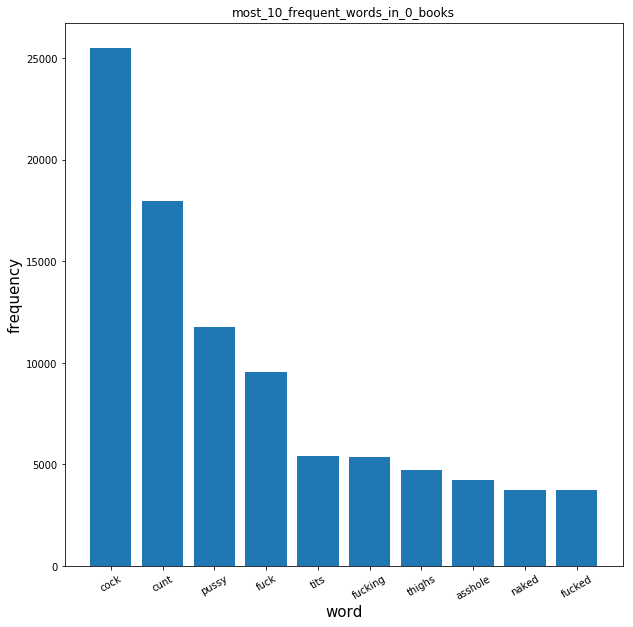

In [94]:
plot_bar_char_and_save_it(most_10_frequent_words_in_0_books[0],
                          "C:/Users/Abdo/Project/figures/test_data/most_10_frequent_words_in_0_books.png",
                          "most_10_frequent_words_in_0_books","word", "frequency")


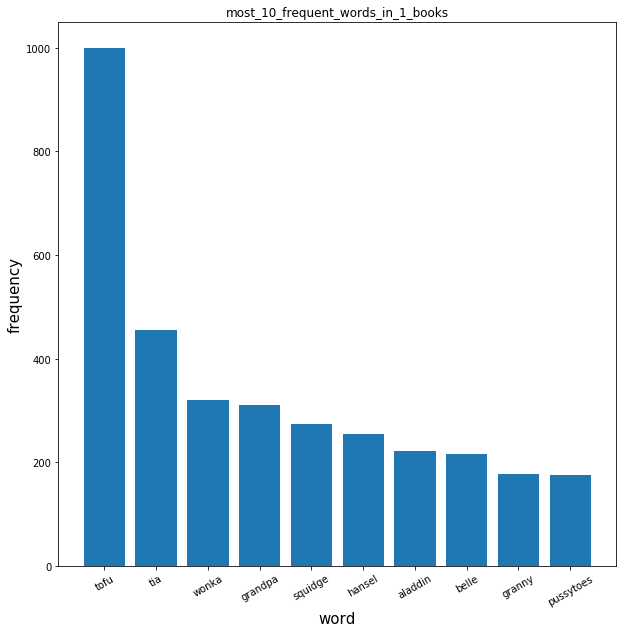

In [95]:
plot_bar_char_and_save_it(most_10_frequent_words_in_1_books[0],
                          "C:/Users/Abdo/Project/figures/test_data/most_10_frequent_words_in_1_books.png",
                          "most_10_frequent_words_in_1_books","word", "frequency")

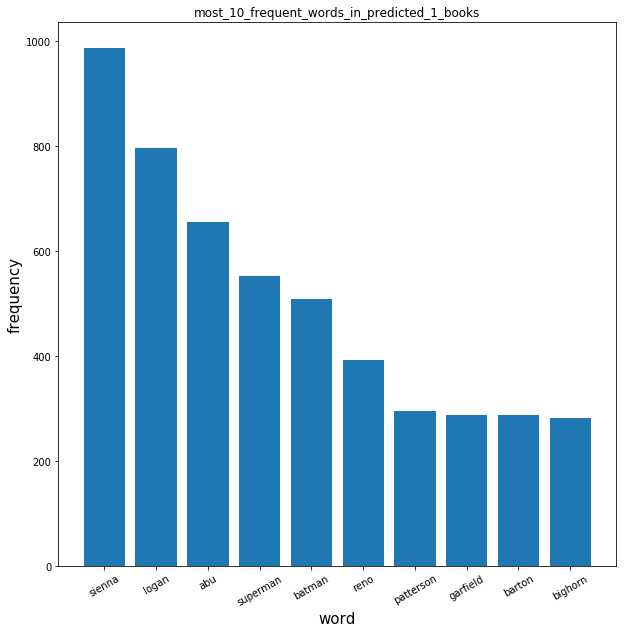

In [96]:
plot_bar_char_and_save_it(most_10_frequent_words_in_predicted_1_books[0],
                          "C:/Users/Abdo/Project/figures/test_data/most_10_frequent_words_in_predicted_1_books.png",
                          "most_10_frequent_words_in_predicted_1_books","word", "frequency")

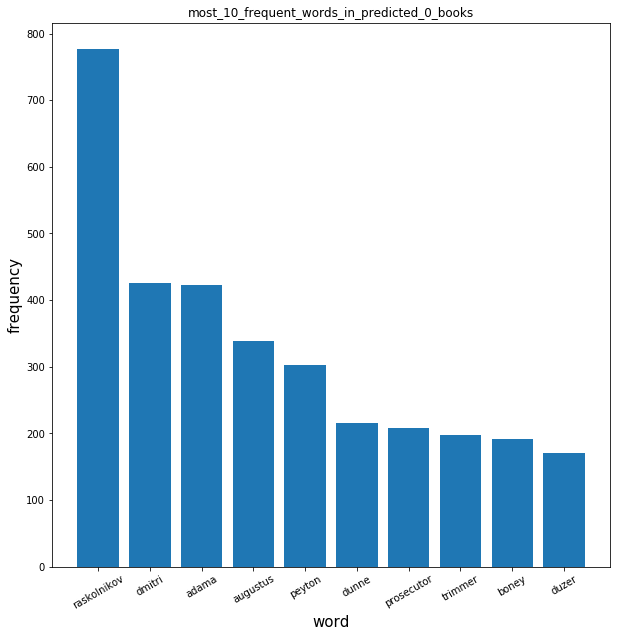

In [97]:
plot_bar_char_and_save_it(most_10_frequent_words_in_predicted_0_books[0],
                          "C:/Users/Abdo/Project/figures/test_data/most_10_frequent_words_in_predicted_0_books.png",
                          "most_10_frequent_words_in_predicted_0_books","word", "frequency")

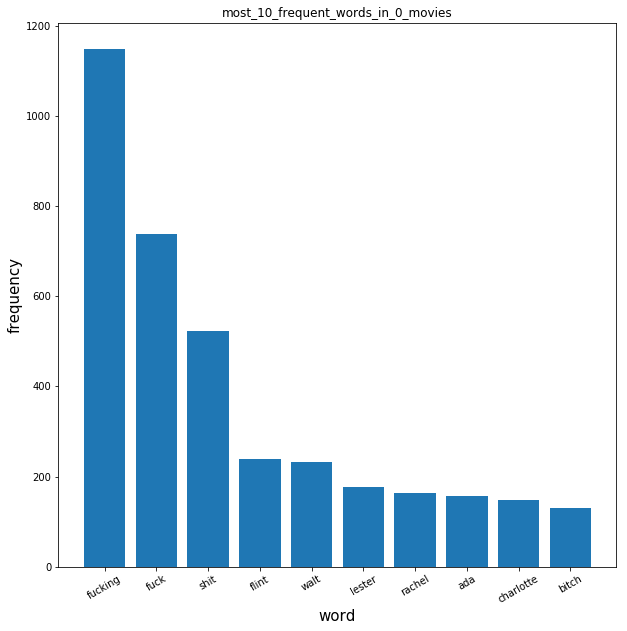

In [98]:
plot_bar_char_and_save_it(most_10_frequent_words_in_0_movies[0],
                          "C:/Users/Abdo/Project/figures/test_data/most_10_frequent_words_in_0_movies.png",
                          "most_10_frequent_words_in_0_movies","word", "frequency")

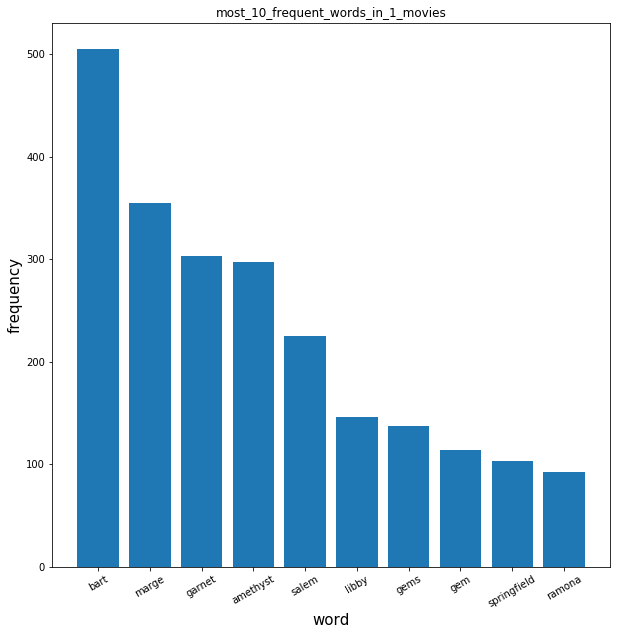

In [99]:
plot_bar_char_and_save_it(most_10_frequent_words_in_1_movies[0],
                          "C:/Users/Abdo/Project/figures/test_data/most_10_frequent_words_in_1_movies.png",
                          "most_10_frequent_words_in_1_movies","word", "frequency")

In [100]:
inappropriate_words = []
file = open("C:/Users/Abdo/Project/Notes/inappropriate_words.txt","r")
for word in file.readlines():
    inappropriate_words.append(word.replace("\n",""))

In [104]:
# key: 0_books, 1_books, 0_movies, 1_movies, not_labeled_0_books, not_labeled_1_books
# value: [ (inappropriate word, number of occurences), (..), .... ]
inappropriate_words_dict = {}

# initialize the values 
for key in dict_of_dicts:
    inappropriate_words_dict[key] = []

In [105]:
for key in dict_of_dicts:
    for inappropriate_word in inappropriate_words:
        if inappropriate_word in dict_of_dicts[key]:
            inappropriate_words_dict[key].append( (dict_of_dicts[key][inappropriate_word], inappropriate_word) )
        else:
            # doesn't occur
            inappropriate_words_dict[key].append( (0, inappropriate_word))

In [113]:
for key in inappropriate_words_dict:
    inappropriate_words_dict[key].sort(reverse=True)

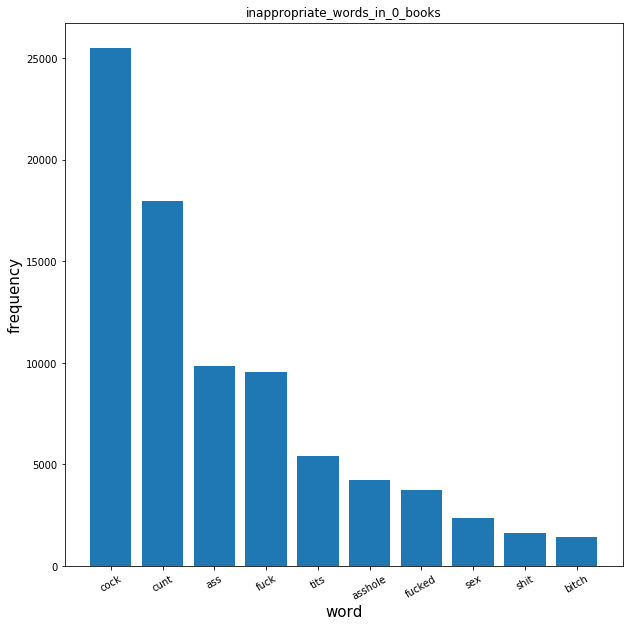

In [114]:
plot_bar_char_and_save_it(inappropriate_words_dict["0_books"][0:10],
                          "C:/Users/Abdo/Project/figures/test_data/inappropriate_words_in_0_books.png",
                          "inappropriate_words_in_0_books","word", "frequency")

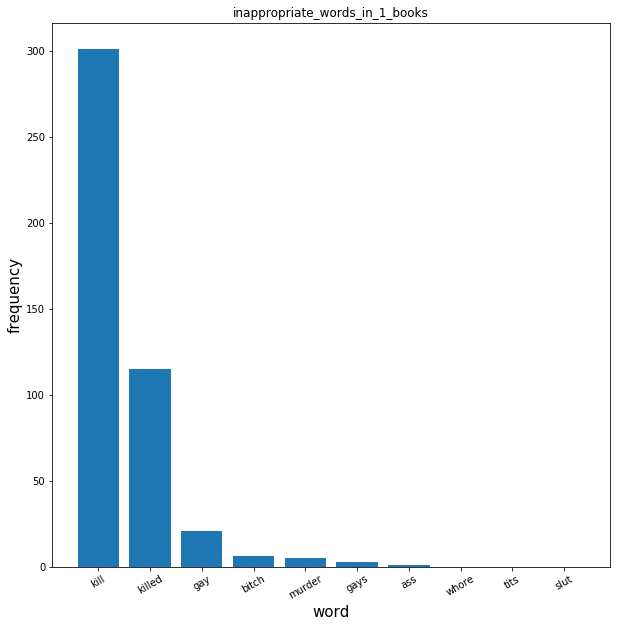

In [115]:
plot_bar_char_and_save_it(inappropriate_words_dict["1_books"][0:10],
                          "C:/Users/Abdo/Project/figures/test_data/inappropriate_words_in_1_books.png",
                          "inappropriate_words_in_1_books","word", "frequency")

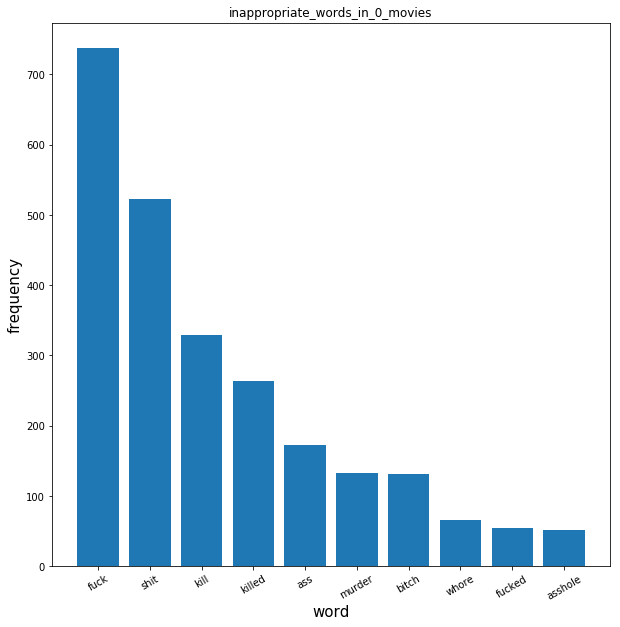

In [116]:
plot_bar_char_and_save_it(inappropriate_words_dict["0_movies"][0:10],
                          "C:/Users/Abdo/Project/figures/test_data/inappropriate_words_in_0_movies.png",
                          "inappropriate_words_in_0_movies","word", "frequency")

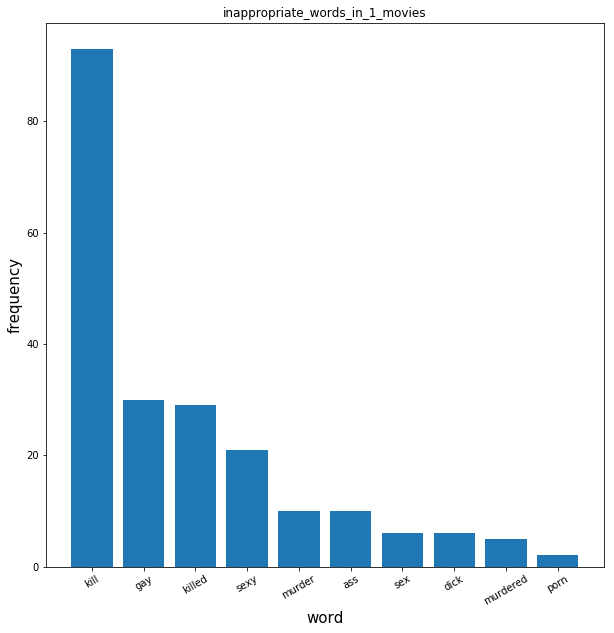

In [117]:
plot_bar_char_and_save_it(inappropriate_words_dict["1_movies"][0:10],
                          "C:/Users/Abdo/Project/figures/test_data/inappropriate_words_in_1_movies.png",
                          "inappropriate_words_in_1_movies","word", "frequency")

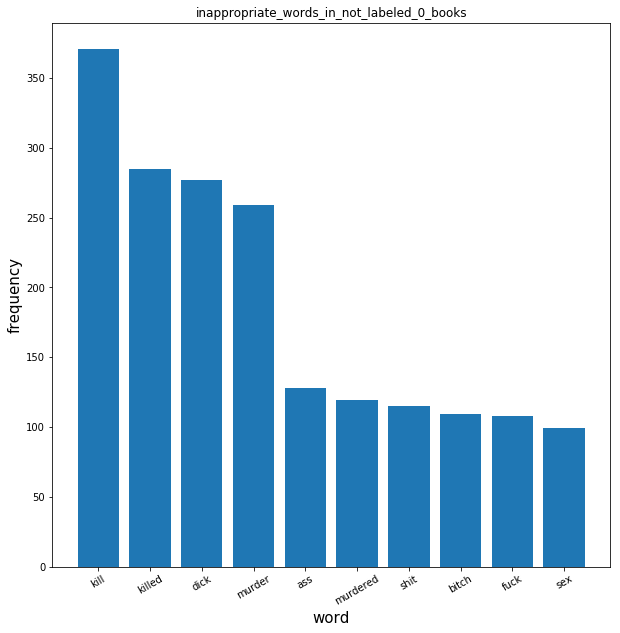

In [118]:
plot_bar_char_and_save_it(inappropriate_words_dict["not_labeled_0_books"][0:10],
                          "C:/Users/Abdo/Project/figures/test_data/inappropriate_words_in_not_labeled_0_books.png",
                          "inappropriate_words_in_not_labeled_0_books","word", "frequency")

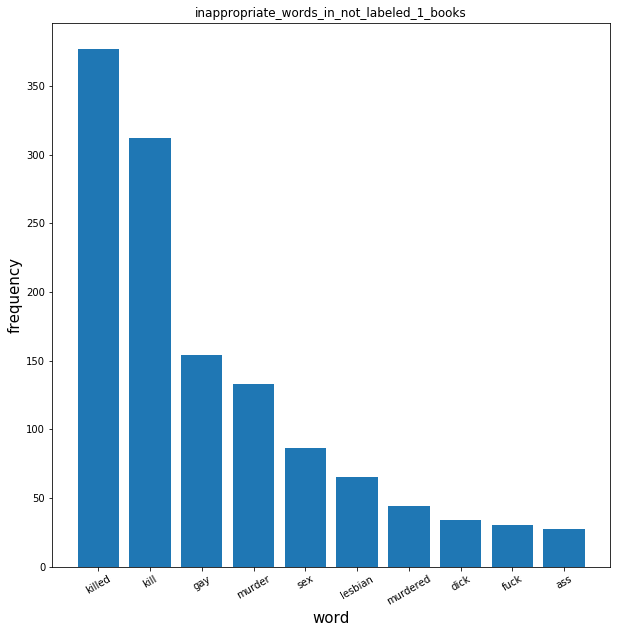

In [119]:
plot_bar_char_and_save_it(inappropriate_words_dict["not_labeled_1_books"][0:10],
                          "C:/Users/Abdo/Project/figures/test_data/inappropriate_words_in_not_labeled_1_books.png",
                          "inappropriate_words_in_not_labeled_1_books","word", "frequency")

In [139]:
# key : label
# value [ (movie_name, prediction),...  ]
books_txt_dict = pre.in_pickle("C:/Users/Abdo/Project/pickle_files/","predictions_dict_books_txt")
movies_txt_dict = pre.in_pickle("C:/Users/Abdo/Project/pickle_files/","predictions_dict_movies_txt")

In [140]:
# has the names of the books that are label 1 and were predicted 0 label
false_negative_books = []

for book in books_txt_dict["1"]:
    if book[1][0] == 0:
        false_negative_books.append(book)

In [141]:
# has the names of the books that are label 1 and were predicted 0 label
false_negative_movies = []

for movie in movies_txt_dict["1"]:
    if movie[1][0] == 0:
        false_negative_movies.append(movie)

In [130]:
# key : movie name
# value: set of inappropriate words in it
inappropriate_words_in_1_movies_dict = {}

In [146]:
label_1_movies_directory = directory_path+"movies_txt/1/"
label_1_movies = os.listdir(label_1_movies_directory)

In [148]:
inappropriate_words_set = set(inappropriate_words)

In [150]:
for movie in label_1_movies:
    try:
        words = pre.preprocess_file(label_1_movies_directory, movie, True)
    except:
        words = pre.preprocess_file(label_1_movies_directory, movie, False)
    
    words_set = set(words)
    inappropriate_movie_words_set = words_set.intersection(inappropriate_words_set)
    if len(inappropriate_movie_words_set) > 0:
        inappropriate_words_in_1_movies_dict[movie] = inappropriate_movie_words_set

full house0.txt
full house0.txt
full house1.txt
full house10.txt
full house11.txt
full house11.txt


full house13.txt
full house14.txt
full house14.txt
full house15.txt
full house16.txt


full house17.txt
full house18.txt
full house19.txt


full house2.txt
full house20.txt
full house3.txt


full house4.txt
full house5.txt
full house6.txt
full house7.txt


full house8.txt
full house9.txt
fuller house0.txt


fuller house1.txt
fuller house11.txt
fuller house12.txt


fuller house13.txt
fuller house14.txt
fuller house15.txt


fuller house16.txt
fuller house17.txt
fuller house18.txt


fuller house19.txt
fuller house2.txt
fuller house3.txt


fuller house4.txt
fuller house5.txt
fuller house6.txt


fuller house7.txt
fuller house8.txt
fuller house9.txt


Sabrina The Teenage Witch0.txt
Sabrina The Teenage Witch1.txt
Sabrina The Teenage Witch11.txt


Sabrina The Teenage Witch12.txt
Sabrina The Teenage Witch13.txt
Sabrina The Teenage Witch14.txt


Sabrina The Teenage Witch15.txt
Sabrina The Teenage Witch16.txt
Sabrina The Teenage Witch17.txt
Sabrina The Teenage Witch17.txt


Sabrina The Teenage Witch18.txt
Sabrina The Teenage Witch19.txt
Sabrina The Teenage Witch2.txt


Sabrina The Teenage Witch20.txt
Sabrina The Teenage Witch3.txt
Sabrina The Teenage Witch4.txt


Sabrina The Teenage Witch5.txt
Sabrina The Teenage Witch6.txt
Sabrina The Teenage Witch7.txt


Sabrina The Teenage Witch8.txt
Sabrina The Teenage Witch9.txt
simpsons0.txt


simpsons1.txt
simpsons10.txt
simpsons11.txt
simpsons12.txt


simpsons13.txt
simpsons14.txt
simpsons15.txt
simpsons16.txt


simpsons17.txt
simpsons18.txt
simpsons19.txt
simpsons2.txt


simpsons2.txt
simpsons20.txt
simpsons21.txt


simpsons22.txt
simpsons23.txt
simpsons24.txt
simpsons25.txt


simpsons26.txt
simpsons27.txt
simpsons28.txt
simpsons29.txt


simpsons3.txt
simpsons30.txt
simpsons31.txt
simpsons32.txt


simpsons33.txt
simpsons34.txt
simpsons35.txt
simpsons36.txt


simpsons37.txt
simpsons38.txt
simpsons39.txt
simpsons4.txt


simpsons40.txt
simpsons5.txt
simpsons6.txt


simpsons7.txt
simpsons8.txt
simpsons9.txt


simsons - Copy.txt
simsons.txt
steven_universe_ep_1.txt
steven_universe_ep_10.txt
steven_universe_ep_11.txt


steven_universe_ep_12.txt
steven_universe_ep_13.txt
steven_universe_ep_14.txt
steven_universe_ep_15.txt
steven_universe_ep_16.txt
steven_universe_ep_17.txt
steven_universe_ep_18.txt
steven_universe_ep_19.txt
steven_universe_ep_2.txt


steven_universe_ep_20.txt
steven_universe_ep_21.txt
steven_universe_ep_22.txt
steven_universe_ep_23.txt
steven_universe_ep_24.txt
steven_universe_ep_25.txt
steven_universe_ep_26.txt
steven_universe_ep_27.txt


steven_universe_ep_28.txt
steven_universe_ep_29.txt
steven_universe_ep_3.txt
steven_universe_ep_30.txt
steven_universe_ep_31.txt
steven_universe_ep_32.txt
steven_universe_ep_33.txt
steven_universe_ep_34.txt
steven_universe_ep_35.txt


steven_universe_ep_4.txt
steven_universe_ep_41.txt
steven_universe_ep_42.txt
steven_universe_ep_43.txt
steven_universe_ep_44.txt
steven_universe_ep_45.txt
steven_universe_ep_46.txt
steven_universe_ep_47.txt


steven_universe_ep_48.txt
steven_universe_ep_49.txt
steven_universe_ep_5.txt
steven_universe_ep_6.txt
steven_universe_ep_7.txt
steven_universe_ep_8.txt
steven_universe_ep_9.txt
steven_universe_op_36.txt
steven_universe_op_37.txt
steven_universe_op_38.txt


steven_universe_op_39.txt
steven_universe_op_40.txt
the simpsons - Copy (10).txt
the simpsons - Copy (11).txt
the simpsons - Copy (12).txt
the simpsons - Copy (2).txt


the simpsons - Copy (3).txt
the simpsons - Copy (4).txt
the simpsons - Copy (5).txt
the simpsons - Copy (6).txt


the simpsons - Copy (7).txt
the simpsons - Copy (8).txt
the simpsons - Copy (9).txt
the simpsons - Copy1.txt


the simpsons1.txt
thomas the engine and friends0.txt
thomas the engine and friends1.txt
thomas the engine and friends11.txt
thomas the engine and friends12.txt
thomas the engine and friends13.txt
thomas the engine and friends14.txt
thomas the engine and friends15.txt
thomas the engine and friends16.txt
thomas the engine and friends17.txt
thomas the engine and friends18.txt
thomas the engine and friends19.txt
thomas the engine and friends2.txt
thomas the engine and friends20.txt
thomas the engine and friends3.txt
thomas the engine and friends4.txt
thomas the engine and friends5.txt
thomas the engine and friends6.txt


thomas the engine and friends7.txt
thomas the engine and friends8.txt
thomas the engine and friends9.txt


In [151]:
print(inappropriate_words_in_1_movies_dict.keys())

dict_keys(['full house1.txt', 'full house11.txt', 'full house13.txt', 'full house14.txt', 'full house17.txt', 'full house18.txt', 'full house2.txt', 'full house3.txt', 'full house5.txt', 'full house6.txt', 'full house7.txt', 'fuller house0.txt', 'fuller house11.txt', 'fuller house12.txt', 'fuller house13.txt', 'fuller house18.txt', 'fuller house19.txt', 'fuller house2.txt', 'fuller house3.txt', 'fuller house4.txt', 'fuller house6.txt', 'fuller house8.txt', 'Sabrina The Teenage Witch0.txt', 'Sabrina The Teenage Witch11.txt', 'Sabrina The Teenage Witch16.txt', 'Sabrina The Teenage Witch19.txt', 'Sabrina The Teenage Witch20.txt', 'Sabrina The Teenage Witch5.txt', 'simpsons1.txt', 'simpsons11.txt', 'simpsons12.txt', 'simpsons14.txt', 'simpsons15.txt', 'simpsons16.txt', 'simpsons17.txt', 'simpsons18.txt', 'simpsons19.txt', 'simpsons2.txt', 'simpsons21.txt', 'simpsons22.txt', 'simpsons23.txt', 'simpsons25.txt', 'simpsons26.txt', 'simpsons27.txt', 'simpsons28.txt', 'simpsons29.txt', 'simpsons

In [154]:
for key in inappropriate_words_in_1_movies_dict:
    print(key, inappropriate_words_in_1_movies_dict[key])

full house1.txt {'kill'}
full house11.txt {'kill'}
full house13.txt {'kill'}
full house14.txt {'sexy'}
full house17.txt {'killed'}
full house18.txt {'sexy', 'kill'}
full house2.txt {'kill'}
full house3.txt {'kill'}
full house5.txt {'sexy'}
full house6.txt {'kill'}
full house7.txt {'murder'}
fuller house0.txt {'sexy'}
fuller house11.txt {'kill'}
fuller house12.txt {'sexy', 'lesbians'}
fuller house13.txt {'sexy'}
fuller house18.txt {'dick'}
fuller house19.txt {'gay'}
fuller house2.txt {'kill'}
fuller house3.txt {'sexy'}
fuller house4.txt {'dick'}
fuller house6.txt {'sexy', 'sex'}
fuller house8.txt {'sexy'}
Sabrina The Teenage Witch0.txt {'killed', 'dick'}
Sabrina The Teenage Witch11.txt {'killed', 'dick'}
Sabrina The Teenage Witch16.txt {'sexy', 'kill'}
Sabrina The Teenage Witch19.txt {'killed'}
Sabrina The Teenage Witch20.txt {'gay'}
Sabrina The Teenage Witch5.txt {'kill'}
simpsons1.txt {'sexy', 'kill'}
simpsons11.txt {'sexy', 'gay'}
simpsons12.txt {'ass'}
simpsons14.txt {'killed'}
simp

In [81]:
try:
    tokens = pre.preprocess_file("C:/Users/Abdo/Project/test_data/books_txt/0/",
                             "A Night To Remember by Argus.txt", True)
except:
    tokens = pre.preprocess_file("C:/Users/Abdo/Project/test_data/books_txt/0/",
                             "A Night To Remember by Argus.txt", False)

prediction = classifier.classify(tokens)
print(prediction)

A Night To Remember by Argus.txt
A Night To Remember by Argus.txt
[1]
